In [1]:
seurat = readRDS('pre_naive_out.RDS')

In [2]:
library(ggplot2)
Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8), 
                     axis.text = element_text(size = 6),
                     axis.text.x = element_text(size = 6),
                     legend.text = element_text(size =6),
                     legend.title = element_text(size = 8),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(size = .355), 
                    axis.ticks = element_line(size = .177))

UMAP_theme = theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,size=.25),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


In [3]:
library(fgsea)
library(GSA)
library(stringr)
library(Seurat)
set.seed(1)
gene.sets = GSA.read.gmt("cd8naive.gmt")
for (i in 1:length(gene.sets$geneset.names)) {
  seurat = AddModuleScore(seurat, features =list(genes = str_to_title(gene.sets[[1]][i][[1]])), name = gene.sets$geneset.names[i])
}



Warning message:
"package 'GSA' was built under R version 4.1.3"
Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp



12341
2
3


Warning message:
"The following features are not present in the object: Atp5if1, Bcl2a1, C6orf89, Ca1, Ca2, Cd99, Faslg, H1-0, H1-2, H2ax, H2az1, Hpf1, Iglc7, Jchain, Kif4a, Mt1e, Mt2a, Nppa, Pclaf, Serpinb6, Sypl1, Txn, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Arhgap45, Bmal1, C12orf57, C19orf48p, Cd1d, Cyb5a, Ddx3y, Dnaaf10, Entrep3, Faap20, Hsd17b8, Ift25, Il4r, Mettl26, Rack1, Rflnb, Rpp14, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Abcb1, Ankh, Bcl2a1, Cipc, Cldnd1, Crybg1, Cyp4v2, Eya4, Faslg, Gk, Kctd12, Ldaf1, Myl1, Pip4p2, Serpinb6, Slc66a3, Yju2b, not searching for symbol synonyms"
Warning message:
"The following features are not present in the object: Adgrl1, Cyb5a, Ddx3y, Hla-Doa, Ifi27l2, Ifit1b, Ift25, Ilrun, Irgm, Noct, Rflnb, Tubb, Ube2d2, not searching for symbol synonyms"


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4."


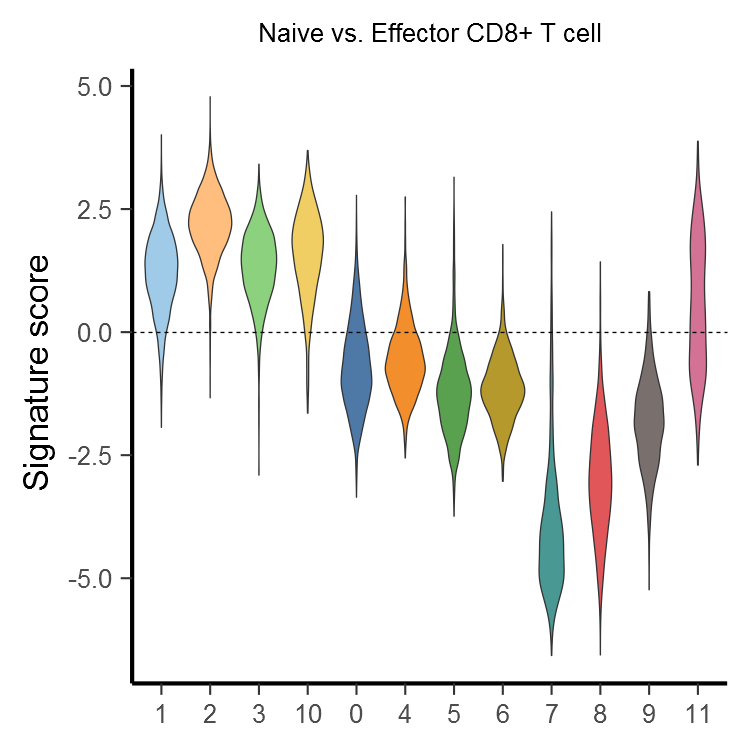

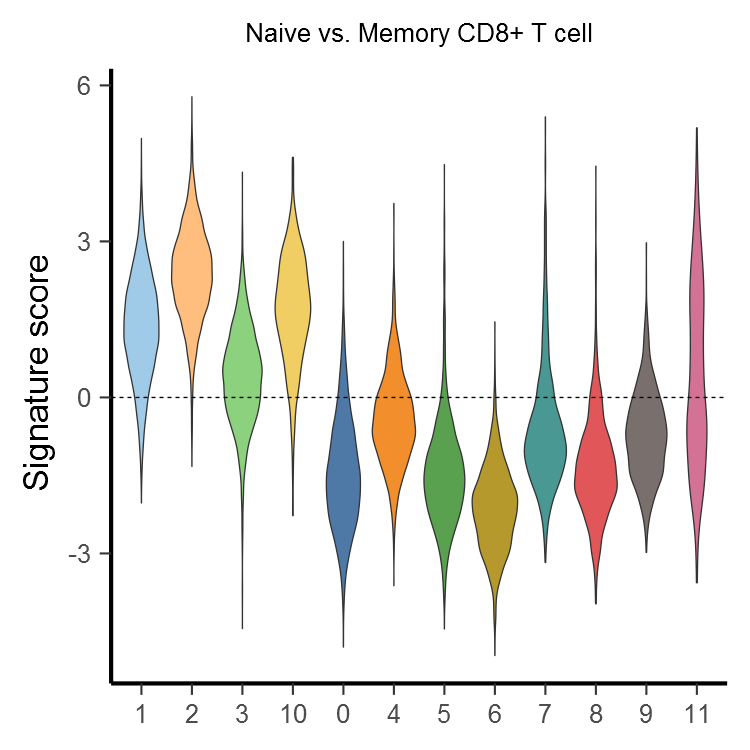

In [4]:
library(ggpubr)
library(ggthemes)
options(repr.plot.width = 2.5, repr.plot.height = 2.5, repr.plot.res = 300)
c1_palette = tableau_color_pal('Tableau 20')(20)[c(2,4,6,8,1,3,5,7,9,11,13,15,17,19)]
names(c1_palette) = c('1',2,3,10,0,4,5,6,7,8,9,11)
g5= ggplot(seurat@meta.data,
           aes( x= integrated_snn_res.0.4, y = scale(GOLDRATH_NAIVE_VS_EFF_CD8_TCELL_UP1)-scale(GOLDRATH_NAIVE_VS_EFF_CD8_TCELL_DN1)
               ,fill =  integrated_snn_res.0.4)) + geom_violin(size = .11167) + theme_classic() + Axis_themes + 
#stat_compare_means(comparisons = list(c(1,2), c(1,3), c(1,4)), label = 'p.signif')  + 
guides(fill = FALSE) + geom_hline(yintercept = 0, linetype = 'dashed', size = .11167) + 
scale_fill_manual(values = c1_palette) +
labs(y = 'Signature score', x =c()) + ggtitle('Naive vs. Effector CD8+ T cell')+ theme(plot.title = element_text(size = 6, hjust = .5)) +
scale_x_discrete(limits = c('1',2,3,10,0,4,5,6,7,8,9,11))
g5


g6= ggplot(seurat@meta.data,
           aes( x= integrated_snn_res.0.4, y = scale(GOLDRATH_NAIVE_VS_MEMORY_CD8_TCELL_UP1)-scale(GOLDRATH_NAIVE_VS_MEMORY_CD8_TCELL_DN1)
               ,fill =  integrated_snn_res.0.4)) + geom_violin(size = .11167) + theme_classic() + Axis_themes + 
#stat_compare_means(comparisons = list(c(1,2), c(1,3), c(1,4)), label = 'p.signif')  + 
guides(fill = FALSE) + geom_hline(yintercept = 0, linetype = 'dashed', size = .11167) + 
scale_fill_manual(values = c1_palette) +
labs(y = 'Signature score', x =c()) + ggtitle('Naive vs. Memory CD8+ T cell')+ theme(plot.title = element_text(size = 6, hjust = .5)) +
scale_x_discrete(limits = c('1',2,3,10,0,4,5,6,7,8,9,11))

g6




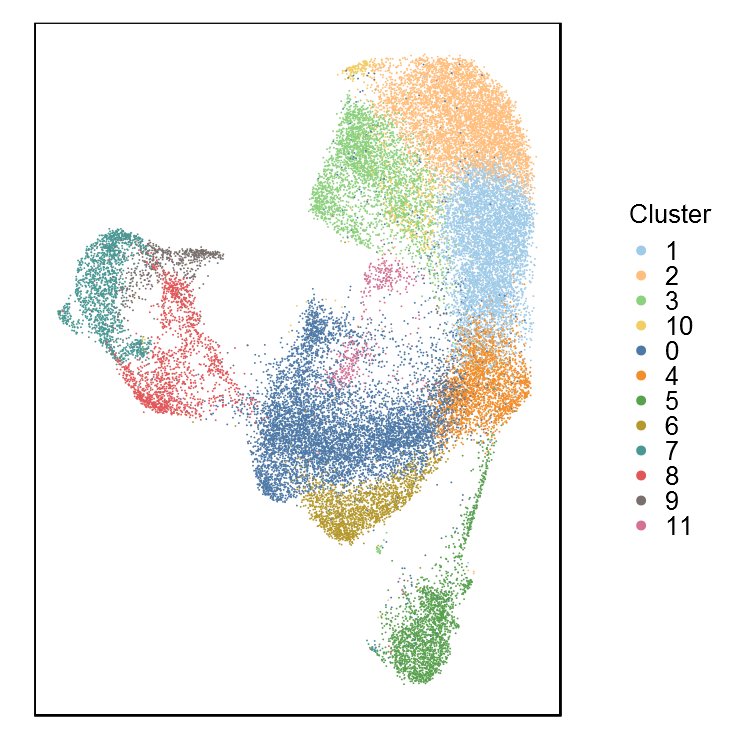

In [5]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5, repr.plot.res = 300)

seurat@meta.data[,c('UMAP1', 'UMAP2')] = Embeddings(seurat, 'umap')
g1 = ggplot((seurat@meta.data), aes(x = UMAP1, y =UMAP2, color = integrated_snn_res.0.4))+ geom_point(size = .1, stroke = 0) + theme_classic() + Axis_themes + UMAP_theme + 
#guides(color = FALSE) + 
scale_color_manual(values = c1_palette,limits = c('1', 2, 3, 10,0, 4, 5, 6, 7, 8, 9, 11)) + theme(panel.border = element_rect(fill=NA, colour = "black", size=.11671))  +          
labs(color = 'Cluster') +
theme(legend.position = "right", legend.key.size = unit(.2, 'cm'), legend.text = element_text(size = 6), legend.title = element_text(size = 6) ) +
guides(color = guide_legend(override.aes = list(size = 1))) 



g1

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




character(0)

Warning message:
"package 'viridis' was built under R version 4.1.3"
Loading required package: viridisLite

Warning message:
"package 'viridisLite' was built under R version 4.1.3"
Warning message:
"`legend.margin` must be specified using `margin()`
i For the old behavior use `legend.spacing`"


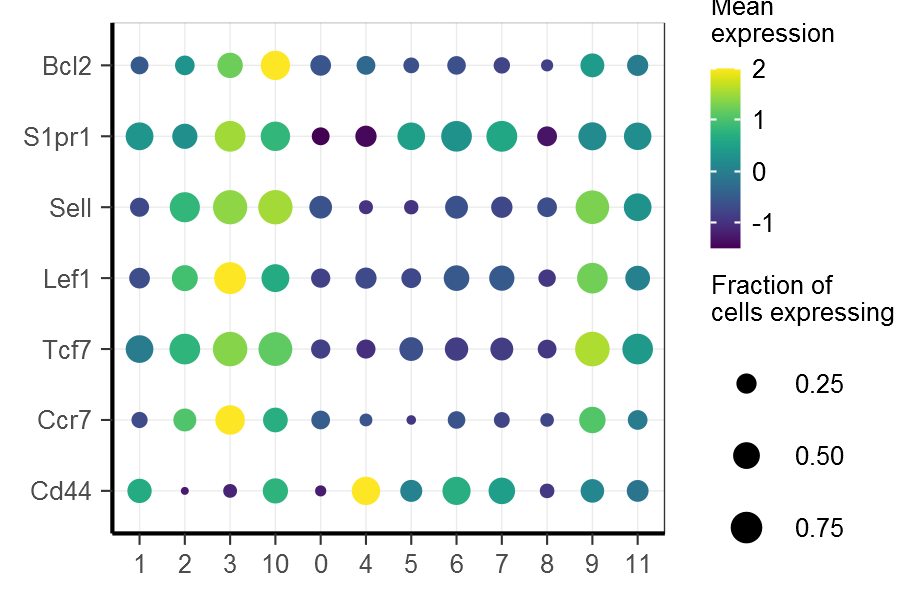

In [6]:
library(dplyr)
#genes = c("Cd3e", 'Cd4', 'Foxp3', 'Il2ra', 'Bcl2', 'S1pr1', 'Sell', 'Lef1', 'Tcf7', 'Ccr7', 'Mki67', 'Top2a','Tubb5', 'Lgals1','Icos', 'Ctla4', 'Cd28', 'Calm3', 'Calm1', 'Calr', 'Itgb1', 'Itgae', 'Cd44', 'Cd69')
genes = c('Bcl2', 'S1pr1', 'Sell', 'Lef1', 'Tcf7', 'Ccr7', 'Cd44')
genes[!genes %in% rownames(seurat)]

options(repr.plot.width = 3, repr.plot.height = 2)
pct = function(x) {
  sum(x >0)/length(x)
}
meanexp = function(x) {
    mean(x)
}
library(reshape2)
library(viridis)
data = as.data.frame(t(as.matrix(GetAssayData(seurat)[genes,])))
data$phenotype = seurat@meta.data$integrated_snn_res.0.4
df_exp = data %>% group_by(phenotype) %>% summarize_all(.funs = list(meanexp)) %>% as.data.frame() 
df_exp[,2:(1+length(genes))] = scale(df_exp[,2:(1+length(genes))])
df_exp = df_exp %>% melt(id.vars = 'phenotype')
df_pct = data %>% group_by(phenotype) %>% summarize_all(.funs = list(pct)) %>% melt(id.vars = 'phenotype')
df_exp$value[df_exp$value > 2]= 2
df_exp$value[df_exp$value < -1.5] = -1.5
df_exp$pct = df_pct$value

lvs = levels(factor(df_exp$phenotype))
g8 = ggplot(as.data.frame(df_exp), aes(y = phenotype, x = variable, size = pct, color = value)) + geom_point() + scale_color_viridis()  + 
 theme_bw()  + theme(axis.title = element_blank()) + 
labs(color = "Scaled\nexpression", size = 'Fraction of\ncells expressing') + scale_x_discrete(limits = rev(genes)) + Axis_themes + 
theme(axis.title = element_blank(), axis.text = element_text(size = 6)) + scale_y_discrete(limits = (lvs),
        labels =  c('1',2,3,10,0,4,5,6,7,8,9,11))  + coord_flip()  +
scale_size_continuous(range = c(.01, 3))+
theme(panel.background = element_rect(size = .11671), panel.border = element_rect(size = .11671), panel.grid.major = element_line(size = .11671), panel.grid.minor = element_line(size = .11671)) + 
guides(color = guide_colorbar(barwidth = .5,barheight = 3, override.aes = list(barwidth = .1))) +
theme(legend.title = element_text(size = 6), legend.spacing.y = unit(.2, 'cm'), legend.margin = unit(0, 'cm'))
#theme( axis.text.x = element_text(angle = 45, hjust = 1))
g8



In [7]:
tcr = readRDS('TCR/tcr_metadata_withnaive.RDS') %>% as.data.frame()

[1] NA                                             
[2] "TGTGCCAGCGGGACAGGGGGCGCAGAAGTCTTCTTT"         
[3] "TGTGCAAGCAGCTTAGGGGGAGGGACACAAGACACCCAGTACTTT"
[4] NA                                             
[5] NA                                             
[6] NA

Warning message:
"`legend.margin` must be specified using `margin()`
i For the old behavior use `legend.spacing`"


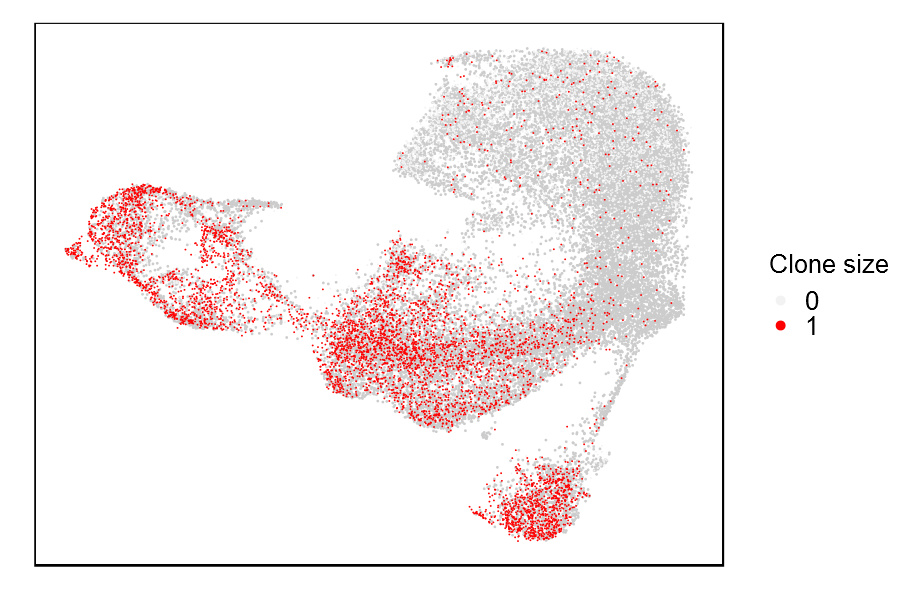

In [8]:
seurat@meta.data$TRB_CDR3 = tcr[colnames(seurat), 'TRB_nuc']
head(seurat@meta.data$TRB_CDR3)

seurat@meta.data$trbid = paste0(seurat@meta.data$letter, seurat@meta.data$hash, seurat@meta.data$TRB_CDR3)
seurat@meta.data$trbid[is.na(seurat$TRB_CDR3)] = NA
tab = table(seurat$trbid)
seurat@meta.data$trb_count = as.numeric(tab[seurat@meta.data$trbid])

seurat$trb_count = factor(as.numeric(seurat@meta.data$trb_count > 1))

g12 = ggplot(seurat@meta.data %>% filter(is.na(TRB_CDR3)) %>% sample_n(n()), aes(x = UMAP1, y =UMAP2)) + geom_point(stroke = 0, size = .2, color = 'grey80') + 
geom_point(data = seurat@meta.data %>% filter(!is.na(TRB_CDR3)) %>% arrange(trb_count), aes(color = trb_count), size = .1, stroke = 0) + 
scale_color_manual(values = c('grey95', 'red')) +
theme_classic() + UMAP_theme +
theme(legend.position = "right", legend.key.size = unit(.2, 'cm'), legend.text = element_text(size = 6), legend.title = element_text(size = 6) ) +
guides(color = guide_legend(override.aes =list(size = 1))) + 
labs(color = 'Clone size') +theme(legend.margin =unit(0, 'cm'))
                                         
g12
     

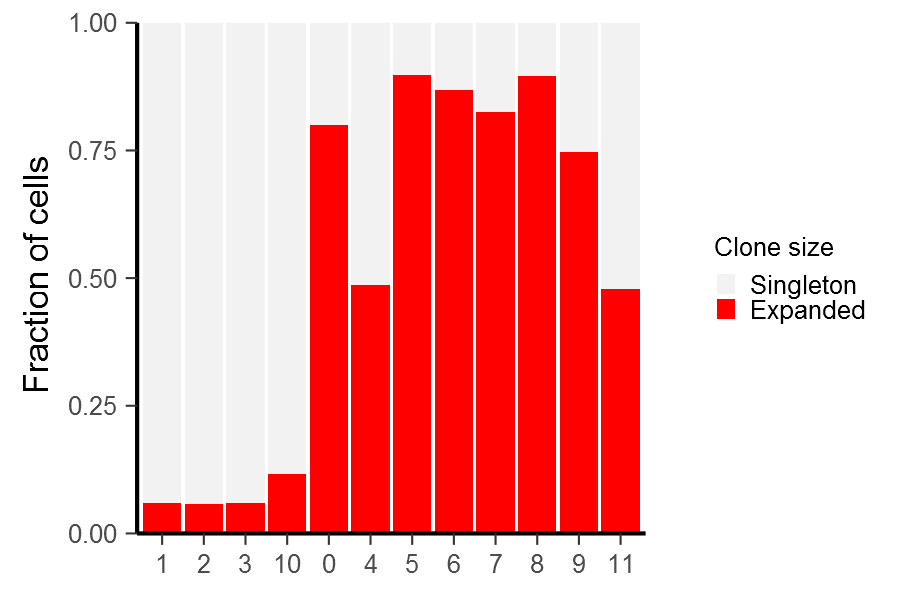

In [9]:
g13 = ggplot(seurat@meta.data %>% filter(!is.na(trb_count)), aes(x = integrated_snn_res.0.4, fill = trb_count)) + 
geom_bar(position= 'fill') + 
theme_classic() + 
Axis_themes + labs(fill = 'Clone size', y = 'Fraction of cells', x = c()) +
scale_y_continuous(expand = c(0,0)) + scale_x_discrete(limits = c('1', 2,3,10,0,4,5,6,7,8,9,11)) +
scale_fill_manual(values = c('grey95', 'red'), labels = c('Singleton', 'Expanded')) +
theme(legend.key.size = unit(.2, 'cm'), legend.title = element_text(size = 6))

g13

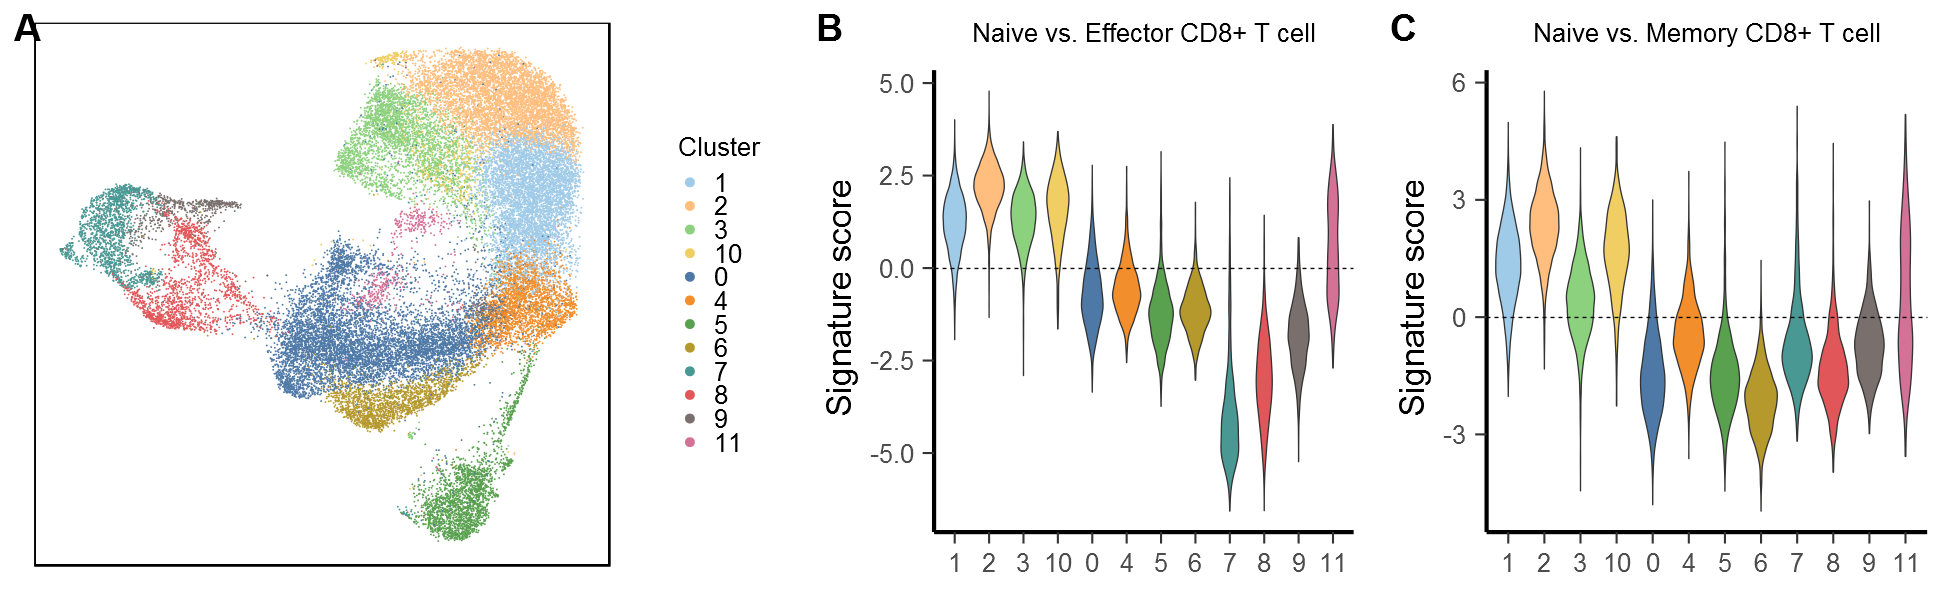

In [11]:
options(repr.plot.width = 6.5, repr.plot.height = 2)

row1 = cowplot::plot_grid(g1, g5, g6, ncol = 3, labels = c('A', 'B', 'C'), label_size = 9, rel_widths = c(1.4, 1,1))
row1

In [12]:
blank = ggplot() + theme(panel.background = element_rect(fill = 'white'))


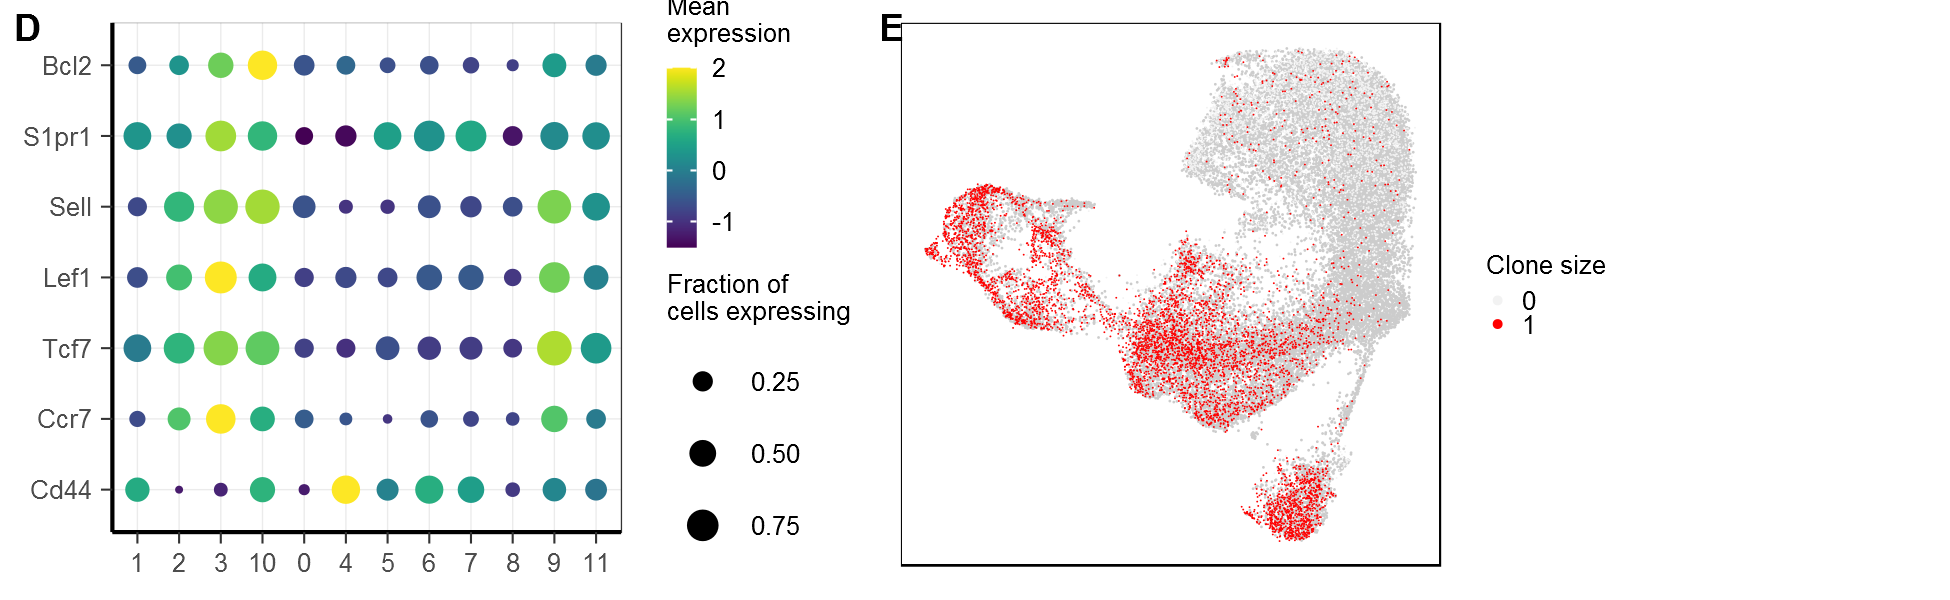

In [13]:
options(repr.plot.width = 6.5, repr.plot.height = 2)

row2 =cowplot::plot_grid(g8, g12,blank, ncol = 3, labels = c('D', 'E'), label_size = 9, rel_widths = c(1.6, 1.4,.6))

row2

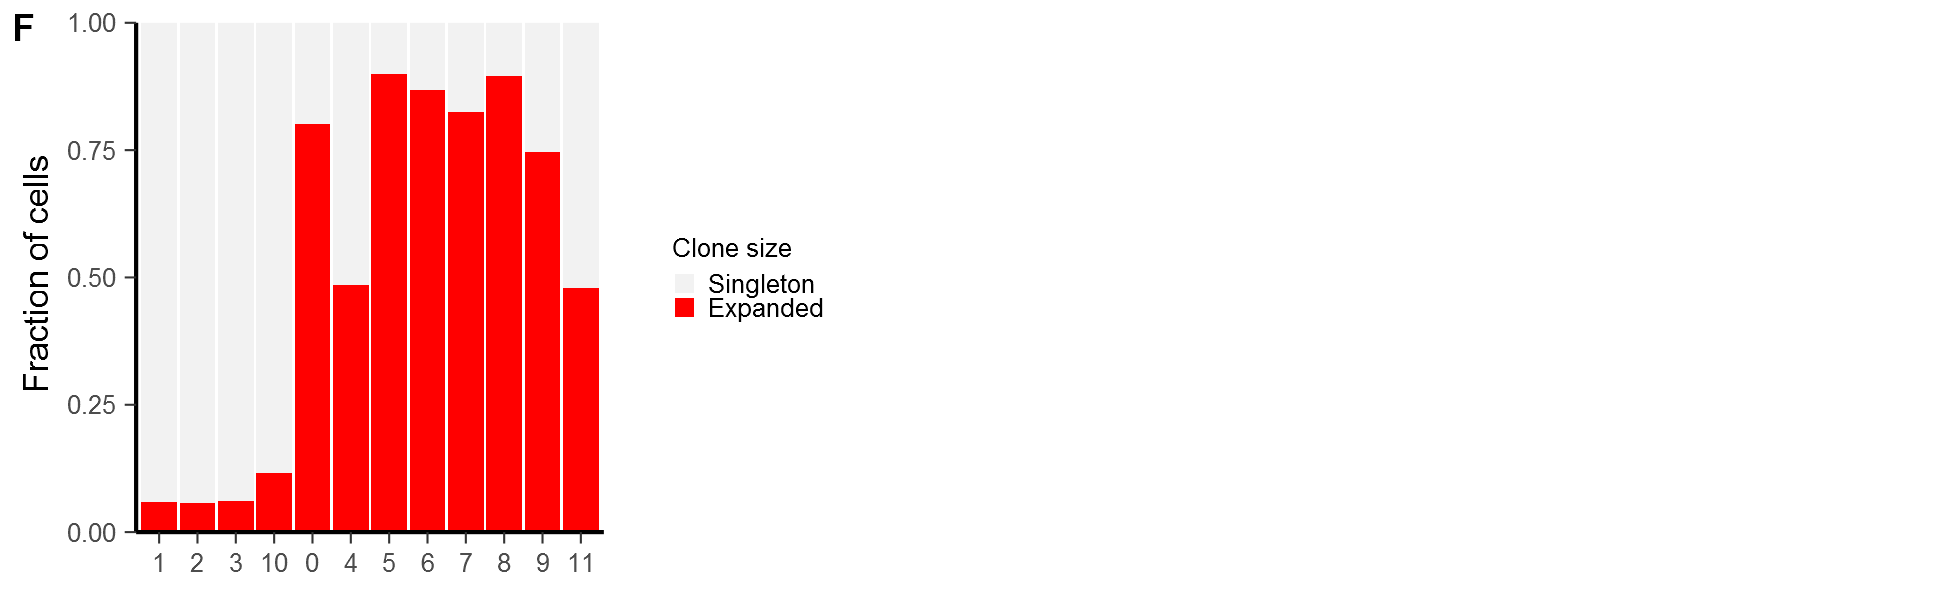

In [15]:
row3  =cowplot::plot_grid(g13, blank, ncol = 2, labels = c('F'), label_size = 9, rel_widths = c(1.6, 2))
row3



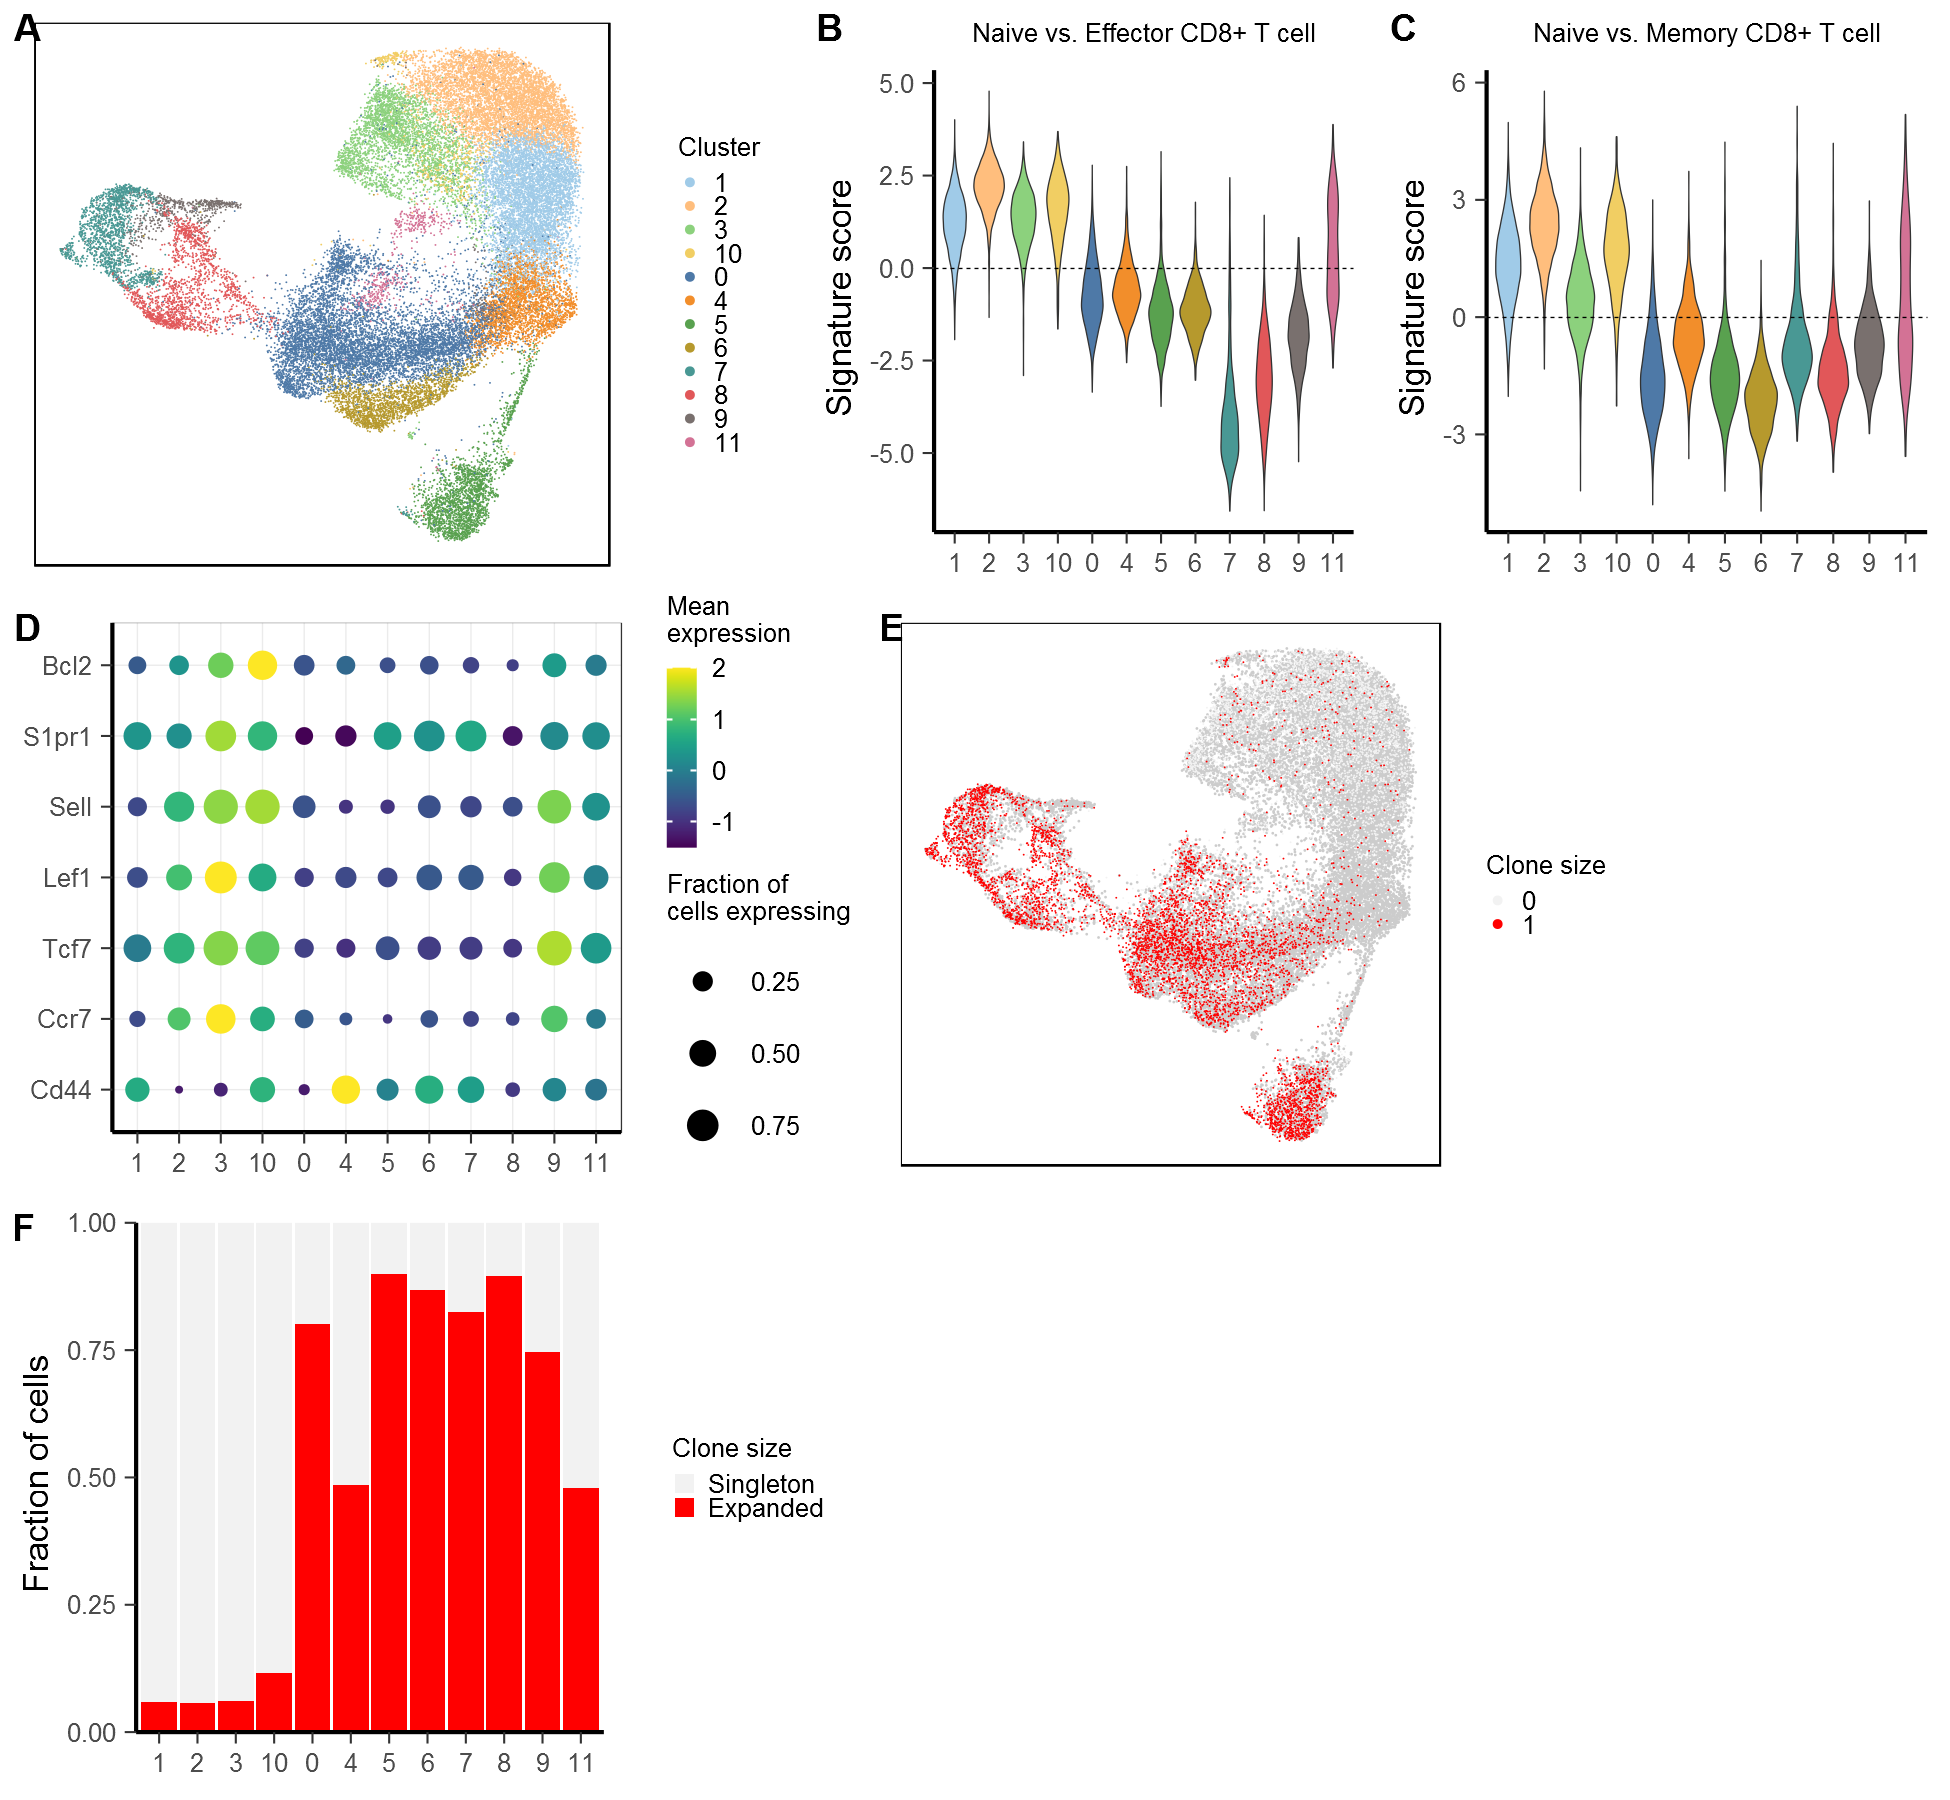

In [16]:
options(repr.plot.width = 6.5, repr.plot.height = 6)

cowplot::plot_grid(row1, row2, row3, ncol = 1)
ggsave('naive_supplement.pdf', height = 6, width = 6.5, useDingbats = FALSE)